# King County Real Estate Project

## Business Understanding

For this project, I have been retained by the leadership of a startup online real estate analytics firm, BCF, LLC ('BCF'). BCF has requested advice for one of its newest clients, a small well established local real estate broker from the King County region of Washington State, located in the Ballard neighborhood of Seattle ('Client'). Client has a large crew of seasoned real estate agents, loan officers, lead generation experts, and other sales supply chain specialists.  Client is currently exploring ideas to scale its business in the King County region and keep pace with newer, more technologically advanced companies. 

Toward this end, Client wants to obtain better data insights by better leveraging the abundance of real estate data available.  Client has approached BCF for an analytical and scientific perpective on what drives residential real estate sales in King County so that it can provide actionable reference points for its relentless 'direct to consumer' sales team. Client is requesting a multivariate regression analysis of the King County real estate market, with `price` being the primary dependent variable.  Client is not interested in the total square footage of living space and has requested that the analysis ignore `sqft_living` as an independent variable. 

## Data and Methodology


Data for this analysis was taken from three different datasets.  The intitial 'given' data provided by BCF is a messy King County dataset with information scraped from the [King County Assessor's website](https://data.kingcounty.gov/Property-Assessments/Assessor-Localscape-Portal/2e9i-fa8a) ('Baseline Model Data'). The second dataset was scraped from [ZipDataMaps](https://www.zipdatamaps.com/king-wa-county-zipcodes) ('Zipcode data'). The third and final dataset was taken from the [King County GIS Open Data Site](https://data.kingcounty.gov/County-Operations/King-County-GIS-Open-Data-site/wuuf-xywg) and includes a range of factors that provide information for the final model.

The initial baseline regression model was built utilizing the base dataset. The second model iteration was built using the

-what each record represents
-which column is begin used as the regress

## Data Preparation and EDA

### Loading the Data

In [442]:

#importing all appropriate Pythonic libraries and packages 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
import re
%matplotlib inline

In [443]:
# import numpy as np
# import pandas as pd
# from matplotlib import pyplot as plt
# %matplotlib inline

 # section_1

[section_3](#section_3)
[section_2](#section_2)

In [444]:
# reading in the King County dataset to Pandas
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Exploration

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [446]:
# dropping the placeholder column
df.drop(labels='id', axis=1, inplace=True)

In [447]:
# converting all dates to datetime
df['date'] = pd.to_datetime(df['date'])

In [448]:
# isolating the zip code 
# alternative methods to achieve same
# df['Zipcode'] = df['address'].str.extract(r'(\d{5}\-?\d{0,4})')
# df['address'][0].split(',')[2][-5:]
# df['address'][1000][-20:-15]

In [449]:
df['Zipcode'] = df['address'].apply(lambda x: x[-20:-15])

In [450]:
df['Zipcode'] = df['Zipcode'].astype(int)

<AxesSubplot:>

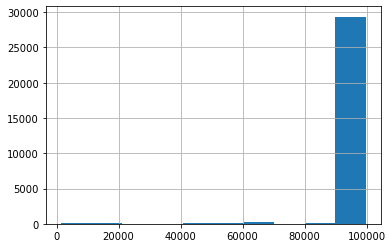

In [451]:
df['Zipcode'].hist()

In [452]:
# controling for outliers
df = df.loc[(df['Zipcode'].astype(int) > 98000) & (df['Zipcode'].astype(int) <= 98922)]

In [453]:
df.Zipcode.nunique()

88

### Renaming Selldate

In [454]:
# renaming date to selldate
rnmdate = {'date':'selldate'}
df.rename(columns=rnmdate, inplace=True)

## Engineering Yr_Old

In [455]:
# creating a year old column
df['yr_old'] = np.where(df['yr_renovated'] !=0,df.selldate.apply(lambda x: x.year) - df['yr_renovated'],
                        df['selldate'].apply(lambda x: x.year) - df['yr_built'])

In [456]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,Zipcode,yr_old
count,2.924100e+04,29241.000000,29241.000000,29241.000000,2.924100e+04,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000
mean,1.112620e+06,3.435040,2.332239,2130.756643,1.719192e+04,1.517151,1825.820423,480.763654,336.275811,216.363599,1973.878458,93.764304,47.543109,-122.214209,98077.684826,44.741698
std,8.953389e+05,0.978861,0.895780,977.344954,6.125879e+04,0.548585,880.729276,585.935636,286.199465,246.749571,31.684861,422.616958,0.147563,0.143653,55.267033,31.007476
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.636797,-122.666021,98001.000000,-1.000000
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.430065,-122.328290,98032.000000,18.000000
50%,8.670000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,142.000000,1976.000000,0.000000,47.557680,-122.234070,98059.000000,43.000000
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.078000e+04,2.000000,2290.000000,960.000000,510.000000,310.000000,2001.000000,0.000000,47.672045,-122.127475,98117.000000,66.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,48.111504,-121.163960,98663.000000,122.000000


In [457]:
# controlling for dates where house was sold after renovation
df.loc[df['yr_old'] < 0, 'yr_old'] = 0

In [458]:
df.yr_old.value_counts()

0      1368
1       664
44      504
54      478
16      468
       ... 
89       32
87       31
119      30
88       30
120      27
Name: yr_old, Length: 123, dtype: int64

### Data Cleaning

In [459]:
# identifying missing values 
df.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.001026
sewer_system     0.000445
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
Zipcode          0.000000
yr_old           0.000000
dtype: float64

In [460]:
# remove missing values in columns
df.dropna(subset=['heat_source', 'sewer_system'], axis=0, inplace=True)

## Target distribution

This baseline model is limited to both discrete and continuous numeric predictors.  

Based on the Mean Absolute Error ('MAE'), overall this baseline model is off by about an average of $338,488.68 for any given prediction. This calculation is the mean absolute (regardless of whether it is positve or negative) distance of all errors.   

The intercept is extremely negative, at minus 9 to the 7th power.  

The coefficient for `sqft_living` tells us that for each increase of square foot living space, we see an associated increase in saleprice of about $327.83 dollars.  

In [461]:
df.corr()['price']

price            1.000000
bedrooms         0.290994
bathrooms        0.488039
sqft_living      0.616741
sqft_lot         0.086790
floors           0.199285
sqft_above       0.546108
sqft_basement    0.246548
sqft_garage      0.267477
sqft_patio       0.317623
yr_built         0.105877
yr_renovated     0.085506
lat              0.296212
long             0.081940
Zipcode         -0.105275
yr_old          -0.137946
Name: price, dtype: float64

/Users/chuck/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

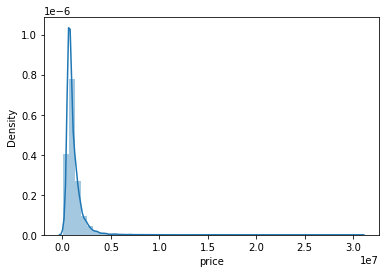

In [462]:
sns.distplot(df['price'])

`sqft_living` is the most highly correlated feature in the baseline numeric model.  

Price is the singular dependent variable in our model.  

## Modeling

In [463]:
# Creating categorical variables
cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'grade']]
cats1 = df[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'grade']]

### Baseline Model

In [464]:
pred_cols = [x for x in df.columns if x not in cats1]

In [465]:
pred_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'yr_old']

In [466]:
# create baseline model
preds = df[pred_cols]
target = df['price']

In [467]:
y = target
X = preds
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [468]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1954.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:30:30   Log-Likelihood:            -4.3197e+05
No. Observations:               29200   AIC:                         8.640e+05
Df Residuals:                   29185   BIC:                         8.641e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.313e+07   4.25e+06    -21.912      0.000   -1.01e+08   -8.48e+07
bedrooms      -1.394e+05   5195.248    -26.833      0.000    -1.5e+05   -1.29e+05
bathrooms      1.179e+05   7701.917     15.305      0.000    1.03e+05    1.33e+05
sqft_living     327.7250     17.255     18.994      0.000     293.905     361.545
sqft_lot          0.1948      0.064      3.025      0.002       0.069       0.321
floors        -9.492e+04   9788.544     -9.697      0.000   -1.14e+05   -7.57e+04
sqft_above      295.6770     17.616     16.784      0.000     261.148     330.206
sqft_basement    82.4744     13.093      6.299      0.000      56.811     108.138
sqft_garage     -35.3134     18.315     -1.928      0.054     -71.211       0.584
sqft_patio      262.0396     17.058     15.362      0.000     228.606     295.474
yr_built       2725.5026    727.737      3.745      0.000    1299.104    4151.901
yr_renovated    203.0562     23.012      8.824      0.000     157.952     248.161
lat            1.535e+06   2.69e+04     57.063      0.000    1.48e+06    1.59e+06
long          -1.199e+05   3.11e+04     -3.859      0.000   -1.81e+05    -5.9e+04
yr_old         4842.8398    731.818      6.618      0.000    3408.443    6277.236
==============================================================================
Omnibus:                    45281.582   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         77556338.212
Skew:                           9.388   Prob(JB):                         0.00
Kurtosis:                     254.779   Cond. No.                     7.13e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [469]:
baseline_mae = mean_absolute_error(y, results.predict(sm.add_constant(X)))
baseline_mae

338894.08774805674

In [470]:
# scaler = StandardScaler()

In [471]:
# X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# X_scaled.head()

In [472]:
# model_scaled = sm.OLS(y.values, sm.add_constant(X_scaled)).fit()
# model_scaled.summary()

# X = sm.add_constant(X.values)
# result = sm.OLS(Y.values, X).fit()

/Users/chuck/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

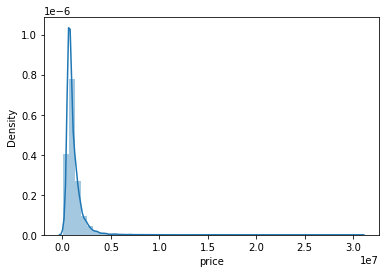

In [473]:
sns.distplot(df['price'])

In [474]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29200 non-null  datetime64[ns]
 1   price          29200 non-null  float64       
 2   bedrooms       29200 non-null  int64         
 3   bathrooms      29200 non-null  float64       
 4   sqft_living    29200 non-null  int64         
 5   sqft_lot       29200 non-null  int64         
 6   floors         29200 non-null  float64       
 7   waterfront     29200 non-null  object        
 8   greenbelt      29200 non-null  object        
 9   nuisance       29200 non-null  object        
 10  view           29200 non-null  object        
 11  condition      29200 non-null  object        
 12  grade          29200 non-null  object        
 13  heat_source    29200 non-null  object        
 14  sewer_system   29200 non-null  object        
 15  sqft_above     2920

# Model # 2

## Merge on zipcode to include neighborhood/population
# section_2

## Bringing in geographic boundaries

In [475]:
from bs4 import BeautifulSoup
import requests

In [476]:
resp = requests.get('https://washington.hometownlocator.com/zip-codes/countyzips,scfips,53033,c,king.cfm')
resp.status_code

200

In [477]:
soup = BeautifulSoup(resp.content)
soup


<!DOCTYPE html>
<html><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<script data-cfasync="false" data-ezscrex="false" data-pagespeed-no-defer="">var __ez=__ez||{};__ez.stms=Date.now();__ez.evt={};__ez.script={};__ez.ck=__ez.ck||{};__ez.template={};__ez.template.isOrig=true;__ez.queue=function(){var e=0,i=0,t=[],n=!1,s=[],r=[],o=!0,a=function(e,i,n,s,r,o,a){var l=this;this.name=e,this.funcName=i,this.parameters=null===n?null:n instanceof Array?n:[n],this.isBlock=s,this.blockedBy=r,this.deleteWhenComplete=o,this.isError=!1,this.isComplete=!1,this.isInitialized=!1,this.proceedIfError=a,this.isTimeDelay=!1,this.process=function(){u("... func = "+e),l.isInitialized=!0,l.isComplete=!0,u("... func.apply: "+e);var i=l.funcName.split("."),n=null;i.length>3||(n=3===i.length?window[i[0]][i[1]][i[2]]:2===i.length?window[i[0]][i[1]]:window[l.funcName]),null!=n&&n.apply(null,this.parameters),!0===l.deleteWhenComplete&&delete t[e],!0===l.isBlock&&(u("----- F'D: "+l.name),

In [478]:
a_tags = soup.find('div', class_='bodycontainer').find_all('a')

In [479]:
city_names = [a.text for a in a_tags[-57:-25]]

In [480]:
city_names

['Auburn',
 'Baring',
 'Bellevue',
 'Black Diamond',
 'Bothell',
 'Burton',
 'Carnation',
 'Duvall',
 'Enumclaw',
 'Fall City',
 'Federal Way',
 'Hobart',
 'Issaquah',
 'Kenmore',
 'Kent',
 'Kirkland',
 'Maple Valley',
 'Medina',
 'Mercer Island',
 'North Bend',
 'Pacific',
 'Preston',
 'Ravensdale',
 'Redmond',
 'Renton',
 'Sammamish',
 'Seahurst',
 'Seattle',
 'Skykomish',
 'Snoqualmie',
 'Vashon',
 'Woodinville']

In [481]:
df['address'].iloc[0].split(", ")[1]

'Renton'

In [482]:
df['city'] = df['address'].apply(lambda x: x.split(', ')[1])

In [483]:
df_no_location_outliers = df.loc[df['city'].isin(city_names)]
df_no_location_outliers.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,Zipcode,yr_old,city
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,53,Renton
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,71,Seattle
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,65,Seattle
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,11,Seattle
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,9,Issaquah


In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29200 non-null  datetime64[ns]
 1   price          29200 non-null  float64       
 2   bedrooms       29200 non-null  int64         
 3   bathrooms      29200 non-null  float64       
 4   sqft_living    29200 non-null  int64         
 5   sqft_lot       29200 non-null  int64         
 6   floors         29200 non-null  float64       
 7   waterfront     29200 non-null  object        
 8   greenbelt      29200 non-null  object        
 9   nuisance       29200 non-null  object        
 10  view           29200 non-null  object        
 11  condition      29200 non-null  object        
 12  grade          29200 non-null  object        
 13  heat_source    29200 non-null  object        
 14  sewer_system   29200 non-null  object        
 15  sqft_above     2920

<AxesSubplot:>

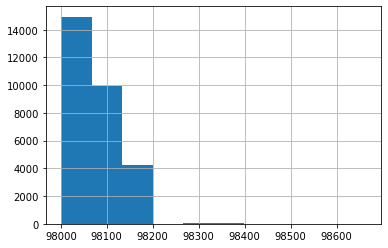

In [485]:
# Outliers
df['Zipcode'].hist()

In [486]:
# df

<AxesSubplot:xlabel='Zipcode'>

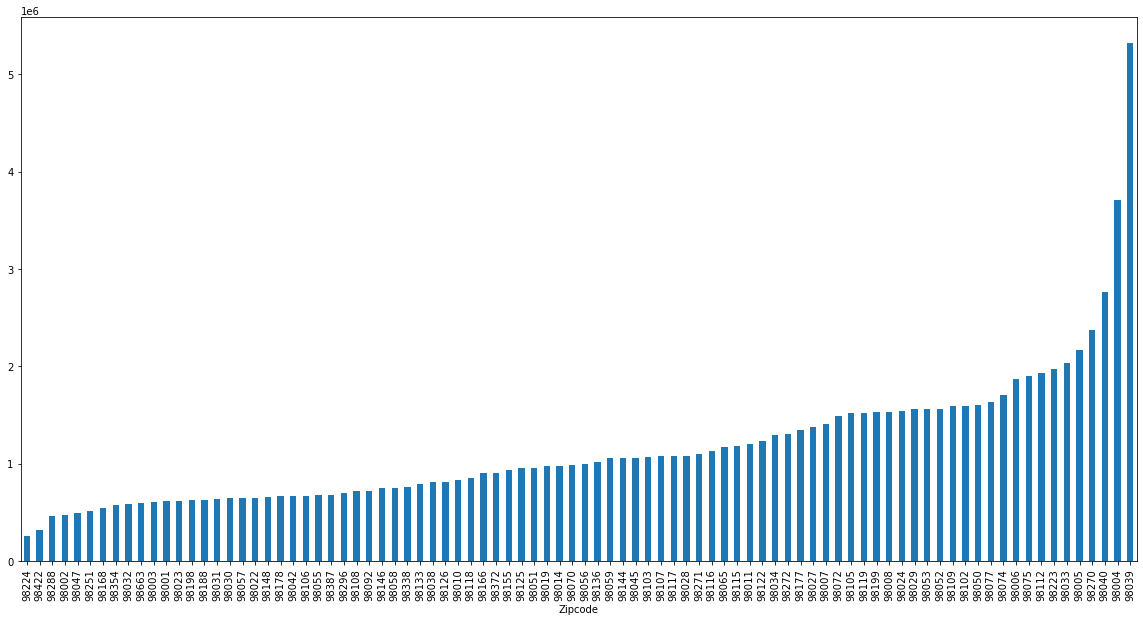

In [487]:
plt.figure(figsize=(20,10))
df.groupby(df.Zipcode).price.mean().sort_values(ascending=True).plot(kind='bar')

In [257]:
# df.Zipcode.astype(int).min()

In [258]:
# # reading in Zip/Neighborhood/Population dataset
# df_zip = pd.read_csv('data/kc_zipcode_details.csv', index_col=0)
# df_zip.tail(55)

In [259]:
# changing index name to match other dataset
# df_zip.index.names = ['Zipcode']

In [260]:
# df_zip.reset_index(inplace=True)
# df_zip.head()

In [261]:
# controlling for outliers
# df_zip = df_zip.loc[(df_zip['Zipcode'] > 98000) & (df_zip['Zipcode'] <= 98288)]

In [262]:
# df_zip['Zipcode'] = df_zip['Zipcode'].astype(str)

In [263]:
# df_zip.nunique()


In [264]:
# df_zip['Zipcode'].nunique()

In [265]:
# identify missing values in zip code data
# df_zip.isna().sum()/df.shape[0]

In [266]:
# df_zip.dropna(subset=['Population'], axis=0, inplace=True)

[section_1](#section_1)
[section_3](#section_3)   

In [267]:
# df = df.merge(df_zip, how='left', on='Zipcode')

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29200 non-null  datetime64[ns]
 1   price          29200 non-null  float64       
 2   bedrooms       29200 non-null  int64         
 3   bathrooms      29200 non-null  float64       
 4   sqft_living    29200 non-null  int64         
 5   sqft_lot       29200 non-null  int64         
 6   floors         29200 non-null  float64       
 7   waterfront     29200 non-null  object        
 8   greenbelt      29200 non-null  object        
 9   nuisance       29200 non-null  object        
 10  view           29200 non-null  object        
 11  condition      29200 non-null  object        
 12  grade          29200 non-null  object        
 13  heat_source    29200 non-null  object        
 14  sewer_system   29200 non-null  object        
 15  sqft_above     2920

In [269]:
# identify missing data in new dataset
df.isna().sum()/df.shape[0]

selldate         0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
Zipcode          0.0
yr_old           0.0
city             0.0
dtype: float64

In [270]:
# df.dropna(subset=['Population', 'Neighborhood'], axis=0, inplace=True)

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29200 non-null  datetime64[ns]
 1   price          29200 non-null  float64       
 2   bedrooms       29200 non-null  int64         
 3   bathrooms      29200 non-null  float64       
 4   sqft_living    29200 non-null  int64         
 5   sqft_lot       29200 non-null  int64         
 6   floors         29200 non-null  float64       
 7   waterfront     29200 non-null  object        
 8   greenbelt      29200 non-null  object        
 9   nuisance       29200 non-null  object        
 10  view           29200 non-null  object        
 11  condition      29200 non-null  object        
 12  grade          29200 non-null  object        
 13  heat_source    29200 non-null  object        
 14  sewer_system   29200 non-null  object        
 15  sqft_above     2920

In [272]:
# no NA/missing values in merged dataset
df.isna().sum()/df.shape[0]

selldate         0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
Zipcode          0.0
yr_old           0.0
city             0.0
dtype: float64

## Protected

The code below was a failed attempt to establish a protected/unprotected feature that would include only homes contained in a greenbelt that likely had some watershed/wildlife/environmental nuisance protection.  It was not correlated with price, nor large enough to be a predictor.  

In [273]:
# df1.loc[(df1['nuisance'] == 'YES') & (df1['greenbelt'] == 'YES'), 'protected'] = 'protected'
# df1.loc[(df1['nuisance'] != 'YES') | (df1['greenbelt'] != 'YES'), 'protected'] = 'unprotected'

In [274]:
# df1['protected']

In [275]:
# df1['protected'].value_counts() 

## Improving upon the baseline

## Standard Scaling

HomeSales 
standard scaling allows you to find coefficients. 
Be sure to include metric - r squared - to describe overall model performance.  
collineriety 
log scalling
remove outliers.  
Increase r squared. 


1. run model
2. see improvements, clean/feature engineer.  
3. see coefficients becoming more accurate.


## Grade - a failed attempt at making an Ordinal category numeric

In [276]:
# df1.grade.value_counts()

In [277]:
# df1.grade.value_counts()

In [278]:
# # grade_map = {
#     "7 Average": 7,
#     "8 Good": 8,
#     "9 Better": 9,
#     "6 Low Average": 6,
#     "5 Fair": 5,
#     "4 Low": 4,
#     "3 Poor": 3,
#     "2 Substandard": 2,
#     "10 Very Good": 10,
#     "11 Excellent": 11,
#     "13 Mansion": 13,
#     "12 Luxury": 12,
# }

In [279]:
# df1.grade = df1.grade.map(grade_map)

In [280]:
# making results more model friendly 
# dum_df1.loc[dum_df1['grade'] == '2 Substandard', 'grade'] = 1
# dum_df1.loc[dum_df1['grade'] == '3 Poor', 'grade'] = 1
# dum_df1.loc[dum_df1['grade'] == '4 Low', 'grade'] = 1

# dum_df1.loc[dum_df1['grade'] == '5 Fair', 'grade'] = 2
# dum_df1.loc[dum_df1['grade'] == '6 Low Average', 'grade'] = 2
# dum_df1.loc[dum_df1['grade'] == '7 Average', 'grade'] = 2

# dum_df1.loc[dum_df1['grade'] == '8 Good', 'grade'] = 3
# dum_df1.loc[dum_df1['grade'] == '9 Better', 'grade'] = 3
# dum_df1.loc[dum_df1['grade'] == '10 Very Good', 'grade'] = 3

# dum_df1.loc[dum_df1['grade'] == '11 Excellent', 'grade'] = 4
# dum_df1.loc[dum_df1['grade'] == '12 Luxury', 'grade'] = 4
# dum_df1.loc[dum_df1['grade'] == '13 Mansion', 'grade'] = 4

The above code, which was not used, was a brief lesson in why you do not want to force ordinal categories into continuous numeric variables, unless the values are in fact multiples of each other.    

## Lesson

scatter plot: visualize relationship  

box plot: gives you quantile info

histograms: distribution of frequencies 

qq plot residuals (outside of range) is 

In [281]:
# plt.boxplot(df1.price)

(array([2.8412e+04, 6.7600e+02, 7.9000e+01, 1.7000e+01, 1.0000e+01,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.7360000e+04, 3.0996240e+06, 6.1718880e+06, 9.2441520e+06,
        1.2316416e+07, 1.5388680e+07, 1.8460944e+07, 2.1533208e+07,
        2.4605472e+07, 2.7677736e+07, 3.0750000e+07]),
 <BarContainer object of 10 artists>)

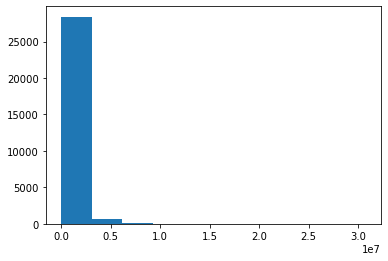

In [282]:
plt.hist(df['price'])

In [283]:
upper_limit = df['price'].mean() + 3*df['price'].std()
lower_limit = df['price'].mean() - 3*df['price'].std()
df['price'] = np.where(df['price'] > upper_limit, upper_limit,
np.where(df['price'] < lower_limit, lower_limit, df['price']))

In [174]:
# sns.heatmap(X.corr())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29200 non-null  datetime64[ns]
 1   price          29200 non-null  float64       
 2   bedrooms       29200 non-null  int64         
 3   bathrooms      29200 non-null  float64       
 4   sqft_living    29200 non-null  int64         
 5   sqft_lot       29200 non-null  int64         
 6   floors         29200 non-null  float64       
 7   waterfront     29200 non-null  object        
 8   greenbelt      29200 non-null  object        
 9   nuisance       29200 non-null  object        
 10  view           29200 non-null  object        
 11  condition      29200 non-null  object        
 12  grade          29200 non-null  object        
 13  heat_source    29200 non-null  object        
 14  sewer_system   29200 non-null  object        
 15  sqft_above     2920

## Discrete numeric predictors 

In [175]:
upper_limit = df['yr_old'].mean() + 3*df['yr_old'].std()
lower_limit = df['yr_old'].mean() - 3*df['yr_old'].std()
df['yr_old'] = np.where(df['yr_old'] > upper_limit, upper_limit,
np.where(df['yr_old'] < lower_limit, lower_limit, df['yr_old']))

In [176]:
# upper_limit = df['floors'].mean() + 3*df['floors'].std()
# lower_limit = df['floors'].mean() - 3*df['floors'].std()
# df['floors'] = np.where(df['floors'] > upper_limit, upper_limit,
# np.where(df['floors'] < lower_limit, lower_limit, df['floors']))

In [177]:
upper_limit = df['sqft_garage'].mean() + 3*df['sqft_garage'].std()
lower_limit = df['sqft_garage'].mean() - 3*df['sqft_garage'].std()

df['sqft_garage'] = np.where(df['sqft_garage'] > upper_limit, upper_limit,
    np.where(df['sqft_garage'] < lower_limit, lower_limit, df['sqft_garage']))

In [178]:
upper_limit = df['sqft_basement'].mean() + 3*df['sqft_basement'].std()
lower_limit = df['sqft_basement'].mean() - 3*df['sqft_basement'].std()

df['sqft_basement'] = np.where(df['sqft_basement'] > upper_limit, upper_limit,
    np.where(df['sqft_basement'] < lower_limit, lower_limit, df['sqft_basement']))

In [179]:
upper_limit = df['sqft_patio'].mean() + 3*df['sqft_patio'].std()
lower_limit = df['sqft_patio'].mean() - 3*df['sqft_patio'].std()

df['sqft_patio'] = np.where(df['sqft_patio'] > upper_limit, upper_limit,
    np.where(df['sqft_patio'] < lower_limit, lower_limit, df['sqft_patio']))

In [1358]:
upper_limit = df['bedrooms'].mean() + 3*df['bedrooms'].std()
lower_limit = df['bedrooms'].mean() - 3*df['bedrooms'].std()
df['bedrooms'] = np.where(df['bedrooms'] > upper_limit, upper_limit,
np.where(df['bedrooms'] < lower_limit, lower_limit, df['bedrooms']))

In [1359]:
upper_limit = df['bathrooms'].mean() + 3*df['bathrooms'].std()
lower_limit = df['bathrooms'].mean() - 3*df['bathrooms'].std()

df['bathrooms'] = np.where(df['bathrooms'] > upper_limit, upper_limit,
    np.where(df['bathrooms'] < lower_limit, lower_limit, df['bathrooms']))

In [1144]:
upper_limit = df['sqft_above'].mean() + 3*df['sqft_above'].std()
lower_limit = df['sqft_above'].mean() - 3*df['sqft_above'].std()

df['sqft_above'] = np.where(df['sqft_above'] > upper_limit, upper_limit,
    np.where(df['sqft_above'] < lower_limit, lower_limit, df['sqft_above']))

In [55]:
upper_limit = df['sqft_lot'].mean() + 3*df['sqft_lot'].std()
lower_limit = df['sqft_lot'].mean() - 3*df['sqft_lot'].std()

df['sqft_lot'] = np.where(df['sqft_lot'] > upper_limit, upper_limit,
    np.where(df['sqft_lot'] < lower_limit, lower_limit, df['sqft_lot']))

In [1511]:

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     594.0
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:09:53   Log-Likelihood:            -4.1200e+05
No. Observations:               29200   AIC:                         8.243e+05
Df Residuals:                   29032   BIC:                         8.257e+05
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -9.098e+07   1.31e+07     -6.938      0.000   -1.17e+08   -6.53e+07
bedrooms                        -2165.9843   2806.614     -0.772      0.440   -7667.077    3335.108
bathrooms                        3.043e+04   3969.820      7.665      0.000    2.26e+04    3.82e+04
sqft_living                       122.1376      8.999     13.572      0.000     104.499     139.777
sqft_lot                            0.5992      0.035     17.148      0.000       0.531       0.668
sqft_above                        140.8396      8.919     15.791      0.000     123.358     158.321
sqft_basement                      32.1680      6.898      4.663      0.000      18.647      45.689
sqft_garage                        36.6749      9.867      3.717      0.000      17.336      56.014
sqft_patio                         19.8409      8.985      2.208      0.027       2.230      37.451
yr_built                         -428.9079    373.170     -1.149      0.250   -1160.339     302.523
yr_renovated                       55.5150     11.802      4.704      0.000      32.383      78.647
lat                               1.31e+05    1.2e+05      1.093      0.275   -1.04e+05    3.66e+05
long                            -7.205e+05   1.03e+05     -6.963      0.000   -9.23e+05   -5.18e+05
yr_old                            199.8934    375.361      0.533      0.594    -535.831     935.618
waterfront_YES                   2.842e+05   1.79e+04     15.895      0.000    2.49e+05    3.19e+05
greenbelt_YES                    3.676e+04   1.26e+04      2.924      0.003    1.21e+04    6.14e+04
nuisance_YES                    -4.667e+04   5269.367     -8.857      0.000    -5.7e+04   -3.63e+04
view_EXCELLENT                   4.126e+05    1.8e+04     22.922      0.000    3.77e+05    4.48e+05
view_FAIR                         7.12e+04   2.36e+04      3.012      0.003    2.49e+04    1.18e+05
view_GOOD                        9.488e+04   1.35e+04      7.026      0.000    6.84e+04    1.21e+05
view_NONE                       -1.016e+05   8217.079    -12.360      0.000   -1.18e+05   -8.55e+04
condition_Fair                  -9.484e+04   2.23e+04     -4.251      0.000   -1.39e+05   -5.11e+04
condition_Good                   5.612e+04   4930.370     11.382      0.000    4.65e+04    6.58e+04
condition_Poor                   -6.88e+04   4.32e+04     -1.592      0.111   -1.53e+05    1.59e+04
condition_Very Good              1.169e+05   6899.453     16.950      0.000    1.03e+05     1.3e+05
heat_source_Gas                  1.135e+04   4684.264      2.422      0.015    2165.172    2.05e+04
heat_source_Gas/Solar            1.354e+05   3.42e+04      3.964      0.000    6.84e+04    2.02e+05
sewer_system_PRIVATE RESTRICTED -4.297e+05   1.49e+05     -2.882      0.004   -7.22

### Model Iteration

### Utilizing categorical variables

In [284]:

cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'city', 'grade', 'Zipcode']]
cats1 = df[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'city', 'grade']]

In [285]:
cat_cols = cats.columns
dum_df = pd.get_dummies(data=df, columns=cat_cols, drop_first=True)

In [286]:
X1=dum_df.drop(labels=['selldate', 'price', 'address', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'grade_2 Substandard', 'heat_source_Electricity/Solar'], axis=1)
y=dum_df.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     594.0
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:25:11   Log-Likelihood:            -4.1200e+05
No. Observations:               29200   AIC:                         8.243e+05
Df Residuals:                   29032   BIC:                         8.257e+05
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -9.098e+07   1.31e+07     -6.938      0.000   -1.17e+08   -6.53e+07
bedrooms                        -2165.9843   2806.614     -0.772      0.440   -7667.077    3335.108
bathrooms                        3.043e+04   3969.820      7.665      0.000    2.26e+04    3.82e+04
sqft_living                       122.1376      8.999     13.572      0.000     104.499     139.777
sqft_lot                            0.5992      0.035     17.148      0.000       0.531       0.668
sqft_above                        140.8396      8.919     15.791      0.000     123.358     158.321
sqft_basement                      32.1680      6.898      4.663      0.000      18.647      45.689
sqft_garage                        36.6749      9.867      3.717      0.000      17.336      56.014
sqft_patio                         19.8409      8.985      2.208      0.027       2.230      37.451
yr_built                         -428.9079    373.170     -1.149      0.250   -1160.339     302.523
yr_renovated                       55.5150     11.802      4.704      0.000      32.383      78.647
lat                               1.31e+05    1.2e+05      1.093      0.275   -1.04e+05    3.66e+05
long                            -7.205e+05   1.03e+05     -6.963      0.000   -9.23e+05   -5.18e+05
yr_old                            199.8934    375.361      0.533      0.594    -535.831     935.618
waterfront_YES                   2.842e+05   1.79e+04     15.895      0.000    2.49e+05    3.19e+05
greenbelt_YES                    3.676e+04   1.26e+04      2.924      0.003    1.21e+04    6.14e+04
nuisance_YES                    -4.667e+04   5269.367     -8.857      0.000    -5.7e+04   -3.63e+04
view_EXCELLENT                   4.126e+05    1.8e+04     22.922      0.000    3.77e+05    4.48e+05
view_FAIR                         7.12e+04   2.36e+04      3.012      0.003    2.49e+04    1.18e+05
view_GOOD                        9.488e+04   1.35e+04      7.026      0.000    6.84e+04    1.21e+05
view_NONE                       -1.016e+05   8217.079    -12.360      0.000   -1.18e+05   -8.55e+04
condition_Fair                  -9.484e+04   2.23e+04     -4.251      0.000   -1.39e+05   -5.11e+04
condition_Good                   5.612e+04   4930.370     11.382      0.000    4.65e+04    6.58e+04
condition_Poor                   -6.88e+04   4.32e+04     -1.592      0.111   -1.53e+05    1.59e+04
condition_Very Good              1.169e+05   6899.453     16.950      0.000    1.03e+05     1.3e+05
heat_source_Gas                  1.135e+04   4684.264      2.422      0.015    2165.172    2.05e+04
heat_source_Gas/Solar            1.354e+05   3.42e+04      3.964      0.000    6.84e+04    2.02e+05
sewer_system_PRIVATE RESTRICTED -4.297e+05   1.49e+05     -2.882      0.004   -7.22

In [287]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

208354.64653641896

Well, we have a much higher R-squared number after incorporating the dummified categorical predictors, as this model claims to explain 64 percent of the variance in `price`.   The constant is no longer statistically significant, so we need to adjust our figures to more accurately account for why that is happening.  We should next remove columns that are statistically significant.  

In [60]:
def backward_regression(X1, y,
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=True):
    included=list(X1.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X1[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(worst_feature, worst_pval)
        if not changed:
            break
    return included

(backward_regression(X1, y))

yr_old 0.9225205761499345
Zipcode_98354 0.8991813311568202
bedrooms 0.7730525571195185
Zipcode_98092 0.7623742140465098
city_Newcastle 0.7268554087874312
city_Fairwood 0.8707342548343803
city_Medina 0.7680211315523111
Zipcode_98039 0.7680211323723071
city_35th Ave SW & SW Holden 0.7393194551515154
Zipcode_98003 0.7027469325162081
city_Snoqualmie Pass 0.6771973698635194
city_Fall City 0.6571786160684367
city_Ames Lake 0.7765017033092046
lat 0.5465823040081879
city_White Center 0.5051803499011478
city_Hobart 0.4880749984026175
city_Normandy Park 0.4773253004628416
city_Lake Forest Park 0.8299432061616215
city_SeaTac 0.45605094338305996
city_Tukwila 0.6704193262538876
city_Seattle 0.7510536284407484
city_Burien 0.5224690240431307
Zipcode_98022 0.3813796630619646
grade_13 Mansion 0.3574310423475261
city_Preston 0.35212971252933123
city_Carnation 0.45064562289961885
city_Kirkland 0.511775935065344
city_Des Moines 0.3237433301874082
city_Snoqualmie 0.32252076349551184
city_Duvall 0.217087583

['bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'long',
 'waterfront_YES',
 'greenbelt_YES',
 'nuisance_YES',
 'view_EXCELLENT',
 'view_FAIR',
 'view_GOOD',
 'view_NONE',
 'condition_Fair',
 'condition_Good',
 'condition_Very Good',
 'heat_source_Gas',
 'heat_source_Gas/Solar',
 'sewer_system_PRIVATE RESTRICTED',
 'sewer_system_PUBLIC',
 'city_Algona',
 'city_Arlington',
 'city_Auburn',
 'city_Baring',
 'city_Beaux Arts',
 'city_Bellevue',
 'city_Black Diamond',
 'city_Bothell',
 'city_Cottage Lake',
 'city_Dash Point',
 'city_Dilworth',
 'city_Eatonville',
 'city_Enumclaw',
 'city_Federal Way',
 'city_Kenmore',
 'city_Kent',
 'city_Lakeland North',
 'city_Marysville',
 'city_Mercer Island',
 'city_Milton',
 'city_Monroe',
 'city_Pacific',
 'city_Puyallup',
 'city_Ravensdale',
 'city_Renton',
 'city_Shoreline',
 'city_Skykomish',
 'city_Snohomish',
 'city_Spanaway',
 'city_Tulalip',
 'city_Vancouv

In [61]:
included = ['bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'long',
 'waterfront_YES',
 'greenbelt_YES',
 'nuisance_YES',
 'view_EXCELLENT',
 'view_FAIR',
 'view_GOOD',
 'view_NONE',
 'condition_Fair',
 'condition_Good',
 'condition_Very Good',
 'heat_source_Gas',
 'heat_source_Gas/Solar',
 'sewer_system_PRIVATE RESTRICTED',
 'sewer_system_PUBLIC',
 'city_Algona',
 'city_Arlington',
 'city_Auburn',
 'city_Baring',
 'city_Beaux Arts',
 'city_Bellevue',
 'city_Black Diamond',
 'city_Bothell',
 'city_Cottage Lake',
 'city_Dash Point',
 'city_Dilworth',
 'city_Eatonville',
 'city_Enumclaw',
 'city_Federal Way',
 'city_Kenmore',
 'city_Kent',
 'city_Lakeland North',
 'city_Marysville',
 'city_Mercer Island',
 'city_Milton',
 'city_Monroe',
 'city_Pacific',
 'city_Puyallup',
 'city_Ravensdale',
 'city_Renton',
 'city_Shoreline',
 'city_Skykomish',
 'city_Snohomish',
 'city_Spanaway',
 'city_Tulalip',
 'city_Vancouver',
 'city_Vashon',
 'city_Woodinville',
 'grade_11 Excellent',
 'grade_12 Luxury',
 'grade_3 Poor',
 'grade_4 Low',
 'grade_5 Fair',
 'grade_6 Low Average',
 'grade_7 Average',
 'grade_8 Good',
 'grade_9 Better',
 'Zipcode_98002',
 'Zipcode_98005',
 'Zipcode_98006',
 'Zipcode_98007',
 'Zipcode_98008',
 'Zipcode_98010',
 'Zipcode_98011',
 'Zipcode_98014',
 'Zipcode_98019',
 'Zipcode_98023',
 'Zipcode_98024',
 'Zipcode_98027',
 'Zipcode_98028',
 'Zipcode_98029',
 'Zipcode_98030',
 'Zipcode_98031',
 'Zipcode_98032',
 'Zipcode_98033',
 'Zipcode_98034',
 'Zipcode_98038',
 'Zipcode_98040',
 'Zipcode_98042',
 'Zipcode_98045',
 'Zipcode_98047',
 'Zipcode_98050',
 'Zipcode_98051',
 'Zipcode_98052',
 'Zipcode_98053',
 'Zipcode_98055',
 'Zipcode_98056',
 'Zipcode_98057',
 'Zipcode_98058',
 'Zipcode_98059',
 'Zipcode_98065',
 'Zipcode_98070',
 'Zipcode_98072',
 'Zipcode_98074',
 'Zipcode_98075',
 'Zipcode_98077',
 'Zipcode_98102',
 'Zipcode_98103',
 'Zipcode_98105',
 'Zipcode_98106',
 'Zipcode_98107',
 'Zipcode_98108',
 'Zipcode_98109',
 'Zipcode_98112',
 'Zipcode_98115',
 'Zipcode_98116',
 'Zipcode_98117',
 'Zipcode_98118',
 'Zipcode_98119',
 'Zipcode_98122',
 'Zipcode_98125',
 'Zipcode_98126',
 'Zipcode_98133',
 'Zipcode_98136',
 'Zipcode_98144',
 'Zipcode_98146',
 'Zipcode_98148',
 'Zipcode_98155',
 'Zipcode_98166',
 'Zipcode_98168',
 'Zipcode_98177',
 'Zipcode_98178',
 'Zipcode_98188',
 'Zipcode_98198',
 'Zipcode_98199',
 'Zipcode_98223',
 'Zipcode_98224',
 'Zipcode_98251',
 'Zipcode_98272',
 'Zipcode_98288',
 'Zipcode_98296',
 'Zipcode_98338',
 'Zipcode_98372',
 'Zipcode_98387',
 'Zipcode_98422',
 'Zipcode_98663']

In [62]:
Out = [x for x in X1.columns if x not in included]
Out

['bedrooms',
 'lat',
 'yr_old',
 'condition_Poor',
 'city_35th Ave SW & SW Holden',
 'city_Ames Lake',
 'city_Burien',
 'city_Carnation',
 'city_Clyde Hill',
 'city_Covington',
 'city_Des Moines',
 'city_Duvall',
 'city_Fairwood',
 'city_Fall City',
 'city_Hobart',
 'city_Hunts Point',
 'city_Issaquah',
 'city_Kirkland',
 'city_Lake Forest Park',
 'city_Maple Valley',
 'city_Medina',
 'city_Newcastle',
 'city_Normandy Park',
 'city_North Bend',
 'city_Preston',
 'city_Redmond',
 'city_Sammamish',
 'city_SeaTac',
 'city_Seattle',
 'city_Snoqualmie',
 'city_Snoqualmie Pass',
 'city_Tukwila',
 'city_Union Hill-Novelty Hill',
 'city_White Center',
 'city_Yarrow Point',
 'grade_13 Mansion',
 'Zipcode_98003',
 'Zipcode_98004',
 'Zipcode_98022',
 'Zipcode_98039',
 'Zipcode_98092',
 'Zipcode_98270',
 'Zipcode_98271',
 'Zipcode_98354']

In [63]:

cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'city', 'grade', 'Zipcode']]
cats1 = df[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'city', 'grade']]

In [64]:
cat_cols = cats.columns
dum_df1 = pd.get_dummies(data=df, columns=cat_cols, drop_first=True)

In [65]:
# # running our model with dummified predictors
X1=X1.drop(labels=Out, axis=1)
y=df.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     770.7
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:39:16   Log-Likelihood:            -4.1199e+05
No. Observations:               29200   AIC:                         8.242e+05
Df Residuals:                   29070   BIC:                         8.253e+05
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -9.444e+07   1.09e+07     -8.698      0.000   -1.16e+08   -7.32e+07
bathrooms                        2.953e+04   3842.421      7.684      0.000     2.2e+04    3.71e+04
sqft_living                       112.7872      8.653     13.035      0.000      95.827     129.747
sqft_lot                            1.5745      0.086     18.350      0.000       1.406       1.743
sqft_above                        144.4682      8.814     16.391      0.000     127.192     161.744
sqft_basement                      38.0057      6.940      5.476      0.000      24.402      51.609
sqft_garage                        39.1281     10.181      3.843      0.000      19.173      59.084
sqft_patio                         25.2951      9.905      2.554      0.011       5.880      44.710
yr_built                         -517.3020    102.353     -5.054      0.000    -717.919    -316.685
yr_renovated                       50.8356      4.927     10.318      0.000      41.178      60.493
long                            -8.002e+05   8.88e+04     -9.016      0.000   -9.74e+05   -6.26e+05
waterfront_YES                   2.893e+05   1.77e+04     16.327      0.000    2.55e+05    3.24e+05
greenbelt_YES                    4.126e+04   1.26e+04      3.287      0.001    1.67e+04    6.59e+04
nuisance_YES                    -4.812e+04   5257.323     -9.153      0.000   -5.84e+04   -3.78e+04
view_EXCELLENT                   4.162e+05   1.79e+04     23.231      0.000    3.81e+05    4.51e+05
view_FAIR                        7.308e+04   2.36e+04      3.099      0.002    2.69e+04    1.19e+05
view_GOOD                        9.869e+04   1.35e+04      7.328      0.000    7.23e+04    1.25e+05
view_NONE                       -1.001e+05   8191.102    -12.225      0.000   -1.16e+05   -8.41e+04
condition_Fair                  -9.212e+04   2.22e+04     -4.142      0.000   -1.36e+05   -4.85e+04
condition_Good                   5.678e+04   4901.380     11.584      0.000    4.72e+04    6.64e+04
condition_Very Good              1.187e+05   6862.827     17.299      0.000    1.05e+05    1.32e+05
heat_source_Gas                  1.402e+04   4681.572      2.995      0.003    4842.927    2.32e+04
heat_source_Gas/Solar            1.414e+05   3.41e+04      4.148      0.000    7.46e+04    2.08e+05
sewer_system_PRIVATE RESTRICTED -4.377e+05   1.49e+05     -2.940      0.003    -7.3e+05   -1.46e+05
sewer_system_PUBLIC              3.684e+04   7501.551      4.910      0.000    2.21e+04    5.15e+04
city_Algona                     -1.897e+06    5.4e+04    -35.142      0.000      -2e+06   -1.79e+06
city_Arlington                  -4.351e+05   8.28e+04     -5.254      0.000   -5.97e+05   -2.73e+05
city_Auburn                     -1.921e+06   2.96e+04    -64.803      0.000   -1.98

In [66]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

208734.56246460637

In [ ]:
# scaler = StandardScaler()

# X_scaled = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
# X_scaled.head()

# model_scaled = sm.OLS(y.values, sm.add_constant(X_scaled)).fit()
# model_scaled.summary()

# # X = sm.add_constant(X.values)
# # result = sm.OLS(Y.values, X).fit()

In [ ]:
# X_log.

## Addressing Multicolinerity

In [468]:
X1.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_patio,yr_renovated,long,Population,...,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Zipcode_98224,Zipcode_98251,Zipcode_98288
bedrooms,1.000000,0.595134,0.634377,0.024704,0.540831,0.233391,0.199222,0.008730,0.139440,0.013021,...,-0.002216,-0.045410,0.013936,-0.022008,-0.015444,-0.008460,-0.008546,-0.018829,-0.004605,-0.018339
bathrooms,0.595134,1.000000,0.767892,0.077547,0.672077,0.242979,0.337310,0.041520,0.184100,-0.054845,...,-0.012276,-0.085832,0.003177,-0.064080,-0.034611,-0.036132,0.012141,-0.015531,-0.007720,-0.025727
sqft_living,0.634377,0.767892,1.000000,0.200892,0.881704,0.314465,0.402356,0.035455,0.233359,-0.101580,...,-0.000130,-0.069831,0.028034,-0.044774,-0.025778,-0.041729,0.017942,-0.012895,-0.008914,-0.017087
sqft_lot,0.024704,0.077547,0.200892,1.000000,0.211274,0.008948,0.231483,0.016530,0.270167,-0.155558,...,-0.003715,-0.015175,-0.004585,-0.021519,-0.009042,-0.019532,-0.036340,0.010329,-0.001693,0.015996
sqft_above,0.540831,0.672077,0.881704,0.211274,1.000000,-0.094814,0.314830,0.007158,0.337772,-0.114727,...,-0.021307,-0.069866,0.004310,-0.060044,-0.024794,-0.044780,-0.021161,-0.010792,-0.006374,-0.014662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zipcode_98198,-0.008460,-0.036132,-0.041729,-0.019532,-0.044780,-0.007189,-0.000519,-0.001241,-0.085622,0.044305,...,-0.013291,-0.014034,-0.012424,-0.014034,-0.010109,1.000000,-0.014527,-0.001234,-0.001234,-0.002850
Zipcode_98199,-0.008546,0.012141,0.017942,-0.036340,-0.021161,0.089024,-0.004320,0.018944,-0.153188,-0.114055,...,-0.013051,-0.013781,-0.012199,-0.013781,-0.009927,-0.014527,1.000000,-0.001212,-0.001212,-0.002799
Zipcode_98224,-0.018829,-0.015531,-0.012895,0.010329,-0.010792,-0.008480,-0.006270,0.013511,0.053284,-0.027108,...,-0.001109,-0.001171,-0.001036,-0.001171,-0.000843,-0.001234,-0.001212,1.000000,-0.000103,-0.000238
Zipcode_98251,-0.004605,-0.007720,-0.008914,-0.001693,-0.006374,-0.008480,-0.002637,-0.002251,0.052502,-0.023270,...,-0.001109,-0.001171,-0.001036,-0.001171,-0.000843,-0.001234,-0.001212,-0.000103,1.000000,-0.000238


In [1373]:
abs(X1.corr()) > .75

,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,long,...,Zipcode_98224,Zipcode_98251,Zipcode_98272,Zipcode_98288,Zipcode_98296,Zipcode_98338,Zipcode_98372,Zipcode_98387,Zipcode_98422,Zipcode_98663
bathrooms,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zipcode_98338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
Zipcode_98372,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Zipcode_98387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
Zipcode_98422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [1374]:
X2 = X1.corr().abs().stack().reset_index().sort_values(0, ascending=False)
X2['pairs'] = list(zip(X2.level_0, X2.level_1))
X2.set_index(['pairs'], inplace=True)
X2.drop(columns=['level_1', 'level_0'], inplace = True)
X2.columns = ['cc']
X2.drop_duplicates(inplace=True)
X2[(X2.cc>.75) & (X2.cc<1)]

,cc
pairs,
"(city_Vashon, Zipcode_98070)",0.997362
"(city_Kenmore, Zipcode_98028)",0.997096
"(Zipcode_98011, city_Bothell)",0.996156
"(Zipcode_98010, city_Black Diamond)",0.940345
"(sqft_living, sqft_above)",0.881737
"(sqft_living, bathrooms)",0.767852
"(Zipcode_98023, city_Federal Way)",0.765299
"(Zipcode_98072, city_Woodinville)",0.758251


In [1375]:
X1.drop(columns=['sqft_living', 'Zipcode_98070', 
                 'Zipcode_98028', 'city_Bothell', 
                ], inplace=True)

KeyError: "['Neighborhood_Enumclaw', 'city_Snoqualmie'] not found in axis"

In [471]:
model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     538.8
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:05:47   Log-Likelihood:            -4.2350e+05
No. Observations:               29152   AIC:                         8.472e+05
Df Residuals:                   29027   BIC:                         8.483e+05
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            -1.44e+08   1.81e+07     -7.967      0.000   -1.79e+08   -1.09e+08
bedrooms                        -1.655e+04   4359.124     -3.798      0.000   -2.51e+04   -8010.369
bathrooms                         2.91e+04   5737.916      5.072      0.000    1.79e+04    4.03e+04
sqft_living                       145.4676     13.177     11.039      0.000     119.639     171.296
sqft_lot                            1.7183      0.130     13.185      0.000       1.463       1.974
sqft_above                        171.0016     12.994     13.160      0.000     145.532     196.471
sqft_basement                      54.5713     10.060      5.424      0.000      34.852      74.290
sqft_patio                         45.5149     15.051      3.024      0.002      16.014      75.016
yr_renovated                       45.9655      7.060      6.511      0.000      32.128      59.803
long                            -1.313e+06   1.48e+05     -8.895      0.000    -1.6e+06   -1.02e+06
Population                       -437.3622     19.061    -22.945      0.000    -474.723    -400.001
waterfront_YES                   7.296e+05    2.7e+04     26.996      0.000    6.77e+05    7.83e+05
nuisance_YES                      -5.5e+04   7974.560     -6.896      0.000   -7.06e+04   -3.94e+04
view_EXCELLENT                   7.357e+05   2.73e+04     26.978      0.000    6.82e+05    7.89e+05
view_FAIR                        7.916e+04   3.59e+04      2.208      0.027    8891.072    1.49e+05
view_GOOD                        6.685e+04   2.05e+04      3.268      0.001    2.68e+04    1.07e+05
view_NONE                       -9.138e+04   1.24e+04     -7.350      0.000   -1.16e+05    -6.7e+04
condition_Fair                  -1.305e+05   3.38e+04     -3.860      0.000   -1.97e+05   -6.42e+04
condition_Good                   5.282e+04   7091.222      7.449      0.000    3.89e+04    6.67e+04
condition_Very Good              1.163e+05   9947.175     11.690      0.000    9.68e+04    1.36e+05
heat_source_Gas                  1.587e+04   7086.801      2.240      0.025    1983.056    2.98e+04
heat_source_Gas/Solar            1.761e+05   5.18e+04      3.399      0.001    7.45e+04    2.78e+05
sewer_system_PRIVATE RESTRICTED -6.132e+05   2.26e+05     -2.711      0.007   -1.06e+06    -1.7e+05
sewer_system_PUBLIC              5.647e+04   1.13e+04      4.975      0.000    3.42e+04    7.87e+04
city_Algona                     -2.285e+06   9.17e+04    -24.913      0.000   -2.47e+06   -2.11e+06
city_Auburn                     -2.332e+06   6.32e+04    -36.909      0.000   -2.46e+06   -2.21e+06
city_Baring                     -7.026e+06   3.31e+05    -21.239      0.000   -7.67e+06   -6.38e+06
city_Beaux Arts                  -1.92e+06   1.33e+05    -14.412      0.000   -2.18

## Categorical Variables

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

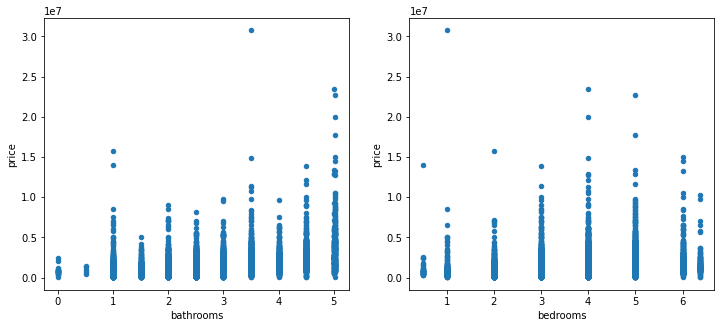

In [472]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='bathrooms', y='price', ax=ax1)
df.plot.scatter(x='bedrooms', y='price', ax=ax2)

<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

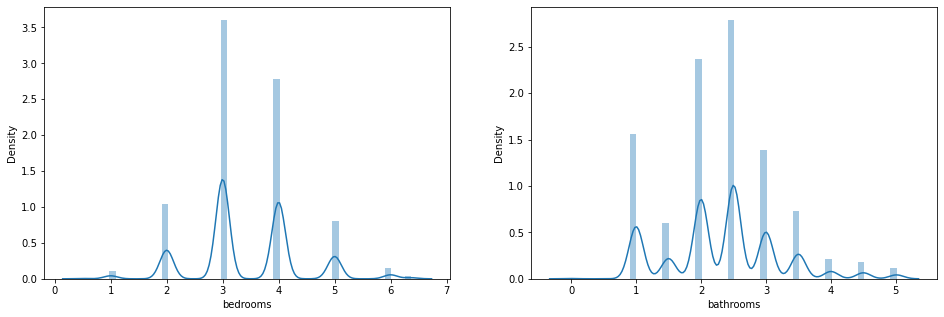

In [473]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['bedrooms'])
plt.subplot(1,2,2)
sns.distplot(df['bathrooms'])

<AxesSubplot:xlabel='floors', ylabel='price'>

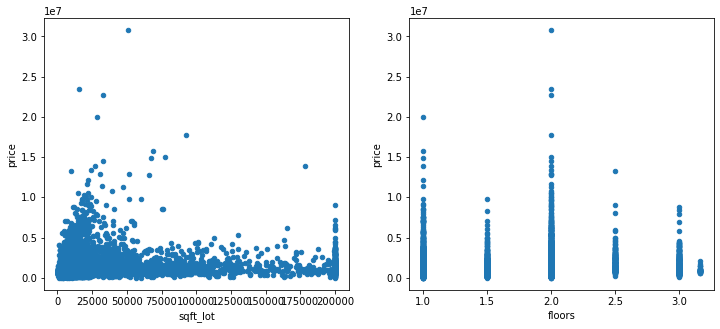

In [474]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='sqft_lot', y='price', ax=ax1)
df.plot.scatter(x='floors', y='price', ax=ax2)

<AxesSubplot:xlabel='floors', ylabel='Density'>

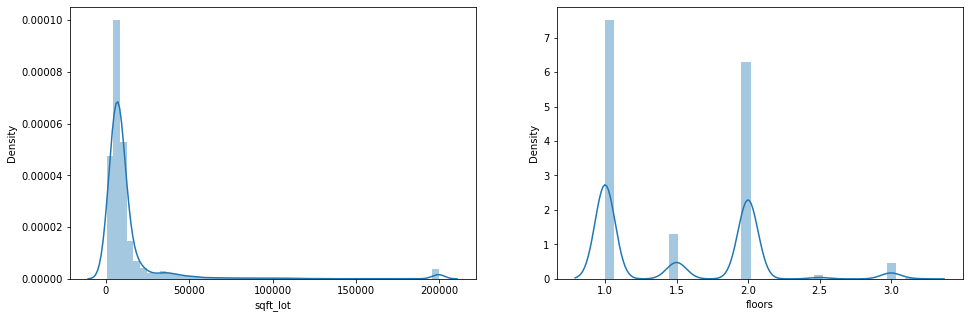

In [475]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_lot'])
plt.subplot(1,2,2)
sns.distplot(df['floors'])

## Continuous numerice predictors

<AxesSubplot:xlabel='sqft_garage', ylabel='price'>

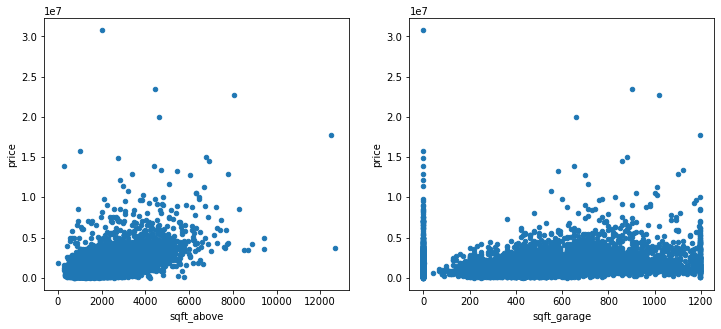

In [476]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='sqft_above', y='price', ax=ax1)
df.plot.scatter(x='sqft_garage', y='price', ax=ax2)

<AxesSubplot:xlabel='sqft_garage', ylabel='Density'>

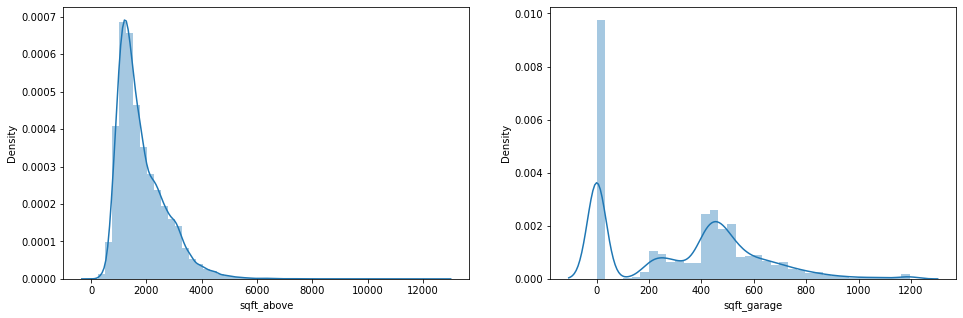

In [477]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_above'])
plt.subplot(1,2,2)
sns.distplot(df['sqft_garage'])

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

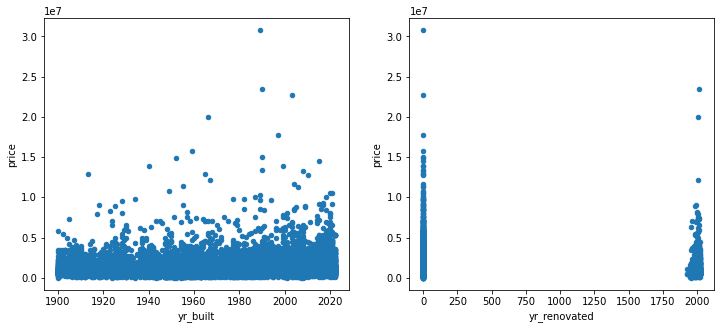

In [478]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='yr_built', y='price', ax=ax1)
df.plot.scatter(x='yr_renovated', y='price', ax=ax2)

<AxesSubplot:xlabel='yr_renovated', ylabel='Density'>

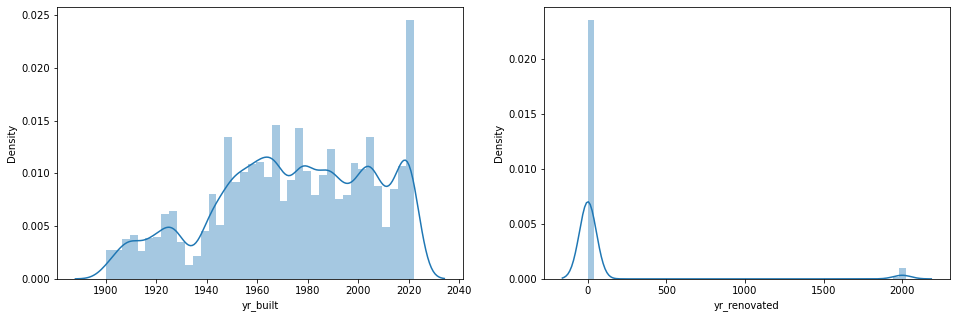

In [479]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['yr_built'])
plt.subplot(1,2,2)
sns.distplot(df['yr_renovated'])

<AxesSubplot:xlabel='sqft_patio', ylabel='price'>

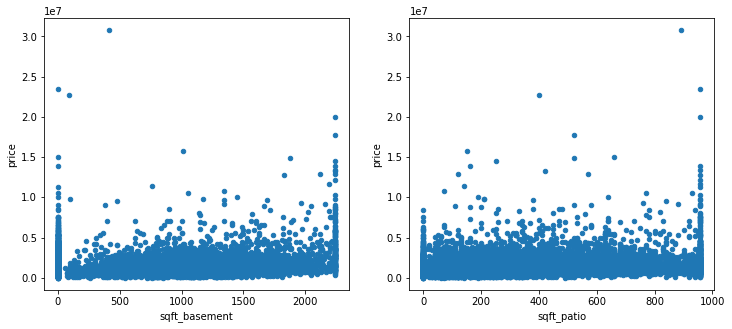

In [480]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='sqft_basement', y='price', ax=ax1)
df.plot.scatter(x='sqft_patio', y='price', ax=ax2)

<AxesSubplot:xlabel='sqft_basement', ylabel='Density'>

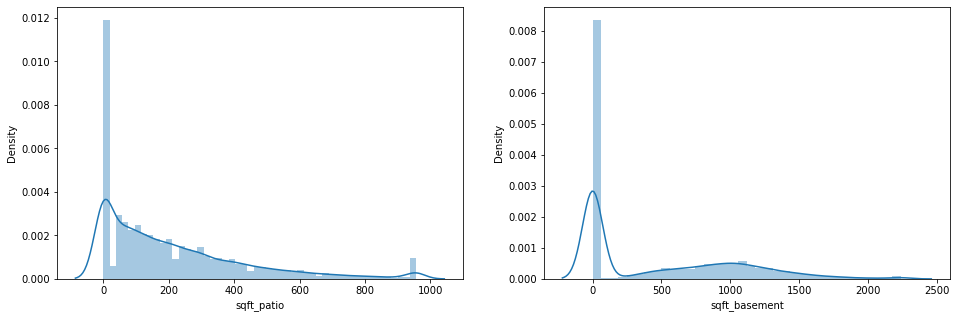

In [481]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_patio'])
plt.subplot(1,2,2)
sns.distplot(df['sqft_basement'])

## Log 

In [483]:
# X_log = df['sqft_lot']

# fig, ax = plt.subplots(ncols=2, figsize=(8,10))

# ax = ax
# left_ax.scatter(, y, alpha=0.5)
# left_ax.set_xlabel("sqft_lot")
# left_ax.set_ylabel("price")
    
# # Plot log transformed version
# right_ax = ax
# right_ax.scatter(np.log(X_log), np.log(y), alpha=0.5)
# right_ax.set_xlabel("log sqft_lot")
# right_ax.set_ylabel("log price")
    
# fig.suptitle("Raw vs. Log Transformed")

# fig.tight_layout()

SyntaxError: invalid syntax (4153997241.py, line 6)

In [ ]:
X_log = X[candidates].copy()

X_log.describe()

In [ ]:
for column in X_log.columns:
    X_log[f"log_{column}"] = np.log(X_log[column])
    X_log.drop(column, axis=1, inplace=True)
    
X_log

In [ ]:
y_log = np.log(y)
y_log.name = "log_SalePrice"
y_log

In [ ]:
model_1 = sm.OLS(y_log, sm.add_constant(X_log))
results2 = model_1.fit()
results2.summary()

In [ ]:
cats2 = ['waterfront', 'view', 'grade', 'condition']
fig, axes = plt.subplots(ncols=len(cats2), figsize=(12,5))
for index, feature in enumerate(cats2):
    df.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
        y='price', ax=axes[index])


There is some real symetry in the grade category.  As the grade increases, it appears that the average price of homes increases as well.  Good views and waterfront properties also seem correlated positively with price, which is understandable.  

In [ ]:
# cats3 = ['nuisance', 'sewer_system', 'greenbelt']
# fig, axes = plt.subplots(ncols=len(cats3), figsize=(12,5))
# for index, feature in enumerate(cats3):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=axes[index])

Not much can be gleaned from these bar charts.  

In [ ]:
# plt.scatter(df1.sewer_system, df1.price)

In [ ]:
# plt.scatter(df1.greenbelt, df1.price)

In [ ]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.sort_values(by='price', ascending=False).plot.scatter(x='condition', y='price', ax=ax1)
# df1.sort_values(by='price', ascending=False).plot.scatter(x='view', y='price', ax=ax2)

In [ ]:
# fig, (ax) = plt.subplots (ncols=1, figsize = (15, 10))
# df1.sort_values(by='price', ascending=False).plot.scatter(x='grade', y='price', ax=ax)

## Attempts at some partial models.  

In [ ]:
# y = df1.price
# X_iter = df1[['sqft_living', 'waterfront', 'grade']]

In [ ]:
# X_iter = pd.get_dummies(X_iter, columns=['grade', 'waterfront'], drop_first=True)

In [ ]:
# model = sm.OLS(y, sm.add_constant(X_iter))
# results = model.fit()
# print(results.summary())

In [ ]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter)))
# mae

The explained variance is higher, but the MAE is worse than our baseline model.  This model is now off by about $359,121.21 for any given prediction.  We will need to adjust the model.  We will attempt some partial regressions below to see what stands out.   

## Partial regression of Grade, sqft_living, and waterfront

In [ ]:
# fig = plt.figure(figsize=(15,8))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter.columns),
#     grid=(2,7),
#     fig=fig)
# plt.tight_layout()
# plt.show()

## Model and partial of Sqft Living, Waterfront, and View

In [ ]:
# y = df1.price
# X_iter2 = df1[['sqft_living', 'waterfront', 'view']]

In [ ]:
# X_iter2 = pd.get_dummies(X_iter2, columns=['view', 'waterfront'], drop_first=True)

In [ ]:
# model = sm.OLS(y, sm.add_constant(X_iter2))
# results = model.fit()
# print(results.summary())

In [ ]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter2)))
# mae

In [ ]:
# fig = plt.figure(figsize=(15,8))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter2.columns),
#     grid=(2,7),
#     fig=fig)
# plt.tight_layout()
# plt.show()

While I feel strongly about sqft living, I am beginning to think view does not have much impact on price as we predicted.  Perhaps the relationship can be better explained by a term or some transformation.  

# Neighborhood

In [ ]:
# Neigh = ['Neighborhood']
# fig, ax = plt.subplots(ncols=len(Neigh), figsize=(12,5))
# for index, feature in enumerate(Neigh):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=ax)


In [ ]:
# y = df1.price
# X_iter_Neigh = df1[['Neighborhood', 'sqft_living', 'waterfront']]
# X_iter_Neigh = pd.get_dummies(X_iter_Neigh, columns=['Neighborhood', 'waterfront'], drop_first=True)

In [ ]:
# model = sm.OLS(y, sm.add_constant(X_iter_Neigh))
# results = model.fit()
# print(results.summary())

In [ ]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter_Neigh)))
# mae

Neighborhood really seems to explain a great deal about the variance in price, and it reduced our MAE down from our baseline.  Our predictions are now around $313,516.77 off by any given predictor.    

In [ ]:
# X_iter_Neigh

In [ ]:
# fig = plt.figure(figsize=(275,475))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter_Neigh.columns),
#     grid=(16,16),
#     fig=fig)
# plt.tight_layout()
# plt.show()

In [ ]:
# # running our model with dummified predictors
# X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
#                        'sewer_system_PUBLIC RESTRICTED', 'yr_built', 'sqft_above', 'bathrooms',
#                       'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
#                       'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
#                       'Neighborhood_Baring' ], axis=1)
# y=dum_df1.price

# model_1 = sm.OLS(y, sm.add_constant(X1))
# results1 = model_1.fit()
# results1.summary()

In [ ]:
# baseline_mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
# # baseline_mae

In [ ]:
# dum_df1 = pd.get_dummies(data=df1, columns=cat_cols, drop_first=True)

In [ ]:
# dum_df1.columns

Drop columns not correlated.  per gp 9-19.  

In [ ]:
# plt.hist(df1.price)

In [ ]:
# sns.distplot(df1.price, bins=30, kde=True)

## Cleaning data

applying a function to remove outliers outside 3 standard deviations

## Bedrooms

In [ ]:
# here we remove outliers by adding them to the highest, most relevant category, thus preserving data.  
df1.bathrooms.value_counts()

In [ ]:
df1.describe()

In [ ]:
# df1.loc[(df1['bedrooms'] > 6) & (df1['bathrooms'] > 6)]

In [ ]:
df1.bathrooms.value_counts()

Anything with zero bathrooms is suspect. 

In [ ]:
# df1.loc[df1['bathrooms'] < 1] = 1
# df1.loc[df1['bathrooms'] > 6] = 6

In [ ]:
# def change_value(condition): 
#     new_living = df1.sqft_living = np.sum(df1.sqft_living, (df1.sqft_garage*.75))
#     new_garage = df1.sqft_garage = np.subtract(df1.sqft_garage, (df1.sqft_garage*.75))
#     if condition == df1.loc[df1['sqft_garage'] > ['sqft_living']]:
#         return new_living, new_garage

In [ ]:
# df1.sqft_garage.apply(change_value)

In [ ]:
# X_iter

In [ ]:
# iter_model = sm.OLS(y, sm.add_constant(X_iter))
# iter_results = iter_model.fit()
# print(iter_results.summary())

In [ ]:
# iter_mae = mean_absolute_error(y, iter_results.predict(sm.add_constant(X_iter)))
# iter_mae

Our iterated model explains about 53 percent of the variance in `price` using `sqft_living` and `Neighborhood`. There  Overall this model is statistically significant, explaining about 38 percent of the variance in price.

In [ ]:
# fig = plt.figure(figsize=(30,220))
# sm.graphics.plot_partregress_grid(
#     iter_results, 
#     exog_idx=list(X_iter.columns),
#     grid=(14,15),
#     fig=fig)
# plt.tight_layout()
# plt.show()

In [ ]:
sns.heatmap(X.corr())

ccpr function partial 

In [ ]:
# df1['Neighborhood'].value_counts()

In [ ]:
# sns.heatmap(X.corr())

In [ ]:
# df1.heat_source

In [ ]:
# # reading in the King County dataset to Pandas
# df_income = pd.read_csv('data/income.csv', index_col=1, skiprows=2)
# # df_income = df_income.drop(columns=['04000US53'], axis=1)

In [ ]:
# df_income

In [ ]:
# inc = {}

In [ ]:
# inc = df_income.T
# inc

In [ ]:
# df

In [ ]:
# Out = df.[[x for x in df.columns if x not in included]]
# cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'city', 'grade']]
# cats1 = df[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'city', 'grade']]

In [ ]:
# Out = [city_Kirkland,
# yr_old
# city_Lakeland North
# city_Cottage Lake
# city_Ames Lake
# city_Fairwood
# city_Issaquah
# city_North Bend
# city_Puyallup
# city_Preston
# city_Spanaway
# city_Hobart
# city_Sammamish
# condition_Poor
# city_Union Hill-Novelty Hill
# city_White Center
# city_Eatonville
# city_Baring
# city_Snoqualmie Pass
# city_35th Ave SW & SW Holden
# city_Snohomish
# city_Marysville
# city_Arlington
# city_Snoqualmie
# city_Redmond

In [ ]:
# X1=dum_df.drop(labels=Out, axis=1)
# # y=dum_df.price

# model_1 = sm.OLS(y, sm.add_constant(X1))
# results1 = model_1.fit()
# results1.summary()

In [ ]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

In [ ]:
# X1 = X1.isin(included)

Took the above code from https://www.datasklr.com/ols-least-squares-regression/variable-selection. 

MAE dropped significantly.  

## TEST without cleaning after baseline

There are three sets of variables that are highly correlated: yr_old and yr_built, sqft_above
and sqft_living, and bathrooms with sqft_living

### Final Model

# section_3

In [ ]:
X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
                      'Neighborhood_Baring', 'grade_2 Substandard', 'Neighborhood_Enumclaw', 'heat_source_Electricity/Solar'], axis=1)
y=dum_df1.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

In [ ]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

 [section_1](#section_1)


[section_2](#section_2)

## Regression Results

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29200 non-null  datetime64[ns]
 1   price          29200 non-null  float64       
 2   bedrooms       29200 non-null  int64         
 3   bathrooms      29200 non-null  float64       
 4   sqft_living    29200 non-null  int64         
 5   sqft_lot       29200 non-null  int64         
 6   floors         29200 non-null  float64       
 7   waterfront     29200 non-null  object        
 8   greenbelt      29200 non-null  object        
 9   nuisance       29200 non-null  object        
 10  view           29200 non-null  object        
 11  condition      29200 non-null  object        
 12  grade          29200 non-null  object        
 13  heat_source    29200 non-null  object        
 14  sewer_system   29200 non-null  object        
 15  sqft_above     2920

In [489]:
# reading in the King County dataset to Pandas
df_dem = pd.read_csv('data/Points_of_Interest.csv')
df_dem

,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,NAME,ABB_NAME,ADDRESS,ZIPCODE
0,-122.067101,47.465386,1,10000032,5733.0,66,Station 79,79,20505 SE 152nd St,98059.0
1,-122.313910,47.552302,2,905,490884.0,664,Cleveland STEM High School,Cleveland,5511 15th Ave S,98108.0
2,-122.195782,47.657500,3,6600168,35858.0,663,Northwest University,NW University,5520 108th Ave NE,98033.0
3,-122.264083,47.319432,4,7,33.0,660,Evergreen Heights Elementary School,Evergreen Heights,5602 S 316th St,98001.0
4,-122.261359,47.333845,5,6600283,692199.0,660,Meredith Hill Elementary School,Hill,5830 S 300th St,98001.0
...,...,...,...,...,...,...,...,...,...,...
5632,-122.234595,47.381758,5633,10001602,898062.0,695,Public Halal Market,Public Halal Market,225 W MEEKER ST,98032.0
5633,-122.296801,47.415187,5634,10001603,391412.0,695,SeaTac International Market& Deli,SeaTac International Market& Deli,20804 INTERNATIONAL BLVD,98198.0
5634,-122.297787,47.407385,5635,10001604,758056.0,695,Madina Halal Market,Madina Halal Market,21630 PACIFIC HWY S,98198.0
5635,-122.177136,47.706192,5636,10001605,36305.0,695,Sahand,Sahand,12047 124TH AVE NE,98034.0


In [490]:
df_dem.drop(labels=['OBJECTID','FEATURE_ID', 'ESITE', 'ABB_NAME', 'ADDRESS'], axis=1, inplace=True)

In [417]:


# import geopandas
# import folium
# from shapely.geometry import Point, LineString, Polygon
# df_dem = geopandas.read_file('data/Points_of_Interest.csv')
# df_dem.head()
# # df_dem.head(20)

In [418]:
# grid_polygon = df_dem

# gdf = geopandas.GeoDataFrame(
#     df_dem, geometry=geopandas.points_from_xy(df_dem.X, df_dem.Y))

# geo_df_filtered = gdf.loc[gdf.within(grid_polygon)]

In [419]:
# = df_dem[df_dem['CODE'] == 330 & ]
# df_dem = df_dem[df_dem['geometry'].apply(lambda x : x.type!='Point')]

In [420]:
# conda install geopy

In [491]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5637 entries, 0 to 5636
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X        5637 non-null   float64
 1   Y        5637 non-null   float64
 2   CODE     5637 non-null   int64  
 3   NAME     5637 non-null   object 
 4   ZIPCODE  5625 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 220.3+ KB


In [492]:
rename_zip = {'ZIPCODE':'Zipcode'}
df_dem.rename(columns=rename_zip, inplace=True)

In [493]:
rename_long = {'X': 'long'}
rename_lat = {'Y': 'lat'}


In [494]:
df_dem.rename(columns=rename_long, inplace=True)
df_dem.rename(columns=rename_lat, inplace=True)

In [495]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5637 entries, 0 to 5636
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   long     5637 non-null   float64
 1   lat      5637 non-null   float64
 2   CODE     5637 non-null   int64  
 3   NAME     5637 non-null   object 
 4   Zipcode  5625 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 220.3+ KB


In [496]:
df_dem.isna().sum()/df_dem.shape[0]

long       0.000000
lat        0.000000
CODE       0.000000
NAME       0.000000
Zipcode    0.002129
dtype: float64

In [497]:
df_dem.dropna(subset=['Zipcode'], axis=0, inplace=True)

In [498]:
# df_dem.loc[df_dem['serv_coord']] = np.array(dict(zip(df_dem.long, df_dem.lat)))

In [499]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 0 to 5636
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   long     5625 non-null   float64
 1   lat      5625 non-null   float64
 2   CODE     5625 non-null   int64  
 3   NAME     5625 non-null   object 
 4   Zipcode  5625 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 263.7+ KB


In [500]:
df = df.merge(df_dem, how='outer', left_on=['Zipcode', 'lat', 'long'], right_on=['Zipcode', 'lat', 'long'])

In [508]:
df['house_coord']= np.array(dict(zip(df.long, df.lat)))

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34825 entries, 0 to 34824
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29200 non-null  datetime64[ns]
 1   price          29200 non-null  float64       
 2   bedrooms       29200 non-null  float64       
 3   bathrooms      29200 non-null  float64       
 4   sqft_living    29200 non-null  float64       
 5   sqft_lot       29200 non-null  float64       
 6   floors         29200 non-null  float64       
 7   waterfront     29200 non-null  object        
 8   greenbelt      29200 non-null  object        
 9   nuisance       29200 non-null  object        
 10  view           29200 non-null  object        
 11  condition      29200 non-null  object        
 12  grade          29200 non-null  object        
 13  heat_source    29200 non-null  object        
 14  sewer_system   29200 non-null  object        
 15  sqft_above     2920

In [510]:
# df.dropna(subset=['house_coord'], axis=0, inplace=True)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 34825 and the array at index 2 has size 29122

In [511]:
df_hosp = df_dem[df_dem['CODE'] == 330]

In [295]:
# house_coord = np.array(dict(zip(df.long, df.lat)))

In [198]:
# df_loc = np.array(dict(zip(df.long, df.lat)))

In [512]:
import geopy.distance

In [513]:
# df[df['CODE'] == 330]

In [514]:
hosp_prox = []

for houseloc in house_coord:
    sortlist = []
    for hosploc in df_hosp.values:
        sortlist.append(geopy.distance.great_circle(houseloc, hosploc).miles)
    hosp_prox.append(min(sortlist))

TypeError: iteration over a 0-d array

In [ ]:
df1.info()

In [ ]:
hosp_dict = 

In [1437]:
# df.loc[hosp, 'near_Hospital'] = df.loc[hosp, 'Zipcode']
# df.loc[Nohosp, 'near_Hospital'] = df.loc[Nohosp, 'Zipcode']

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
hosp = np.where((df_dem['CODE'] == 330 & df_dem['Zipcode' == 1], 1,
                 np.where((df_dem['CODE'] != 330) & df1['Zipcode'] == False), 0,))
                 


In [ ]:
s = geopandas.GeoSeries(
    [
        Point(0, 0),
        LineString([(1, -1), (1, 0), (2, 0), (2, 1)]),
        Polygon([(3, -1), (4, 0), (3, 1)]),
    ]
)

## terms and transformations

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(go.Scattergeo())
# fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(go.Scattergeo())
# fig.update_geos(
#     resolution=50,
#     showcoastlines=True, coastlinecolor="RebeccaPurple",
#     showland=True, landcolor="LightGreen",
#     showocean=True, oceancolor="LightBlue",
#     showlakes=True, lakecolor="Blue",
#     showrivers=True, rivercolor="Blue"
# )
# fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [ ]:
import geopandas

## Conclusion